# In this file I attempt to build the basic framework for doing numerics on the Hyzenberg Spin Chain (without refrence to my professors work)
- Im doing feromagnet bc its cooler

# Imports

In [104]:
import numpy as np

# Plotting Imports
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Set the dark background style
sns.set_theme(style='darkgrid')

# General variables

In [125]:
L = 4 * 60 # number of spins 
#(note: if you are going to be working with a spiral with periodic boundy condtions, make sure L is st the spiral is maintained through the Lth --> 0th spin)

J = 1 # energy factor

J_vec = J * np.array([np.random.choice([-1, 1]), np.random.choice([-1, 1]), 1])

# Timestep for evolution
Tau_F = 1/J

# Evolve until
t = L

# Defining the initial state

In [113]:
# Making a state wherein the initial spins are all in random directions
def make_random_state(n=L):
    state = [] # states are numpy arrays of 3D vecotors (numpy arrays)
    for i in range(n):
        spin_i = np.random.rand(3)
        state.append(spin_i / np.linalg.norm(spin_i))
    
    return np.array(state)

# Making a state wherin all the spins are along a certain z _dir
def make_uniform_state(n=L, z_dir=1):
    state = [] # states are numpy arrays of 3D vecotors (numpy arrays)
    for i in range(n):
        spin_i = [0, 0, z_dir]
        state.append(spin_i)
    
    return np.array(state)

# Make a state wherin the spins look like they are tumbling over each other 
# (most likley the pi/4 spiral will be most used becuase we know it to be an unstable stationary state)
def make_spiral_state(n=L, spiral_angle=np.pi/4, phi=0):
    state = [] # states are numpy arrays of 3D vecotors (numpy arrays)
    for i in range(n):
        spin_i = [0, np.cos(i * spiral_angle + phi), np.sin(i * spiral_angle + phi)]
        state.append(spin_i)
    
    return np.array(state)

# The equation of motion

In [114]:
def diffrential_s(state):
    dstate_dt = []
    for i in range(len(state)):
        prev_index = i-1
        next_index = (i+1) % len(state) # This is assuming we are considering everything to be periodic
        dstate_dt.append(np.cross(-(J * state[prev_index] + J * state[next_index]), state[i]))

    return np.array(dstate_dt)

def evolve_diffrential(state, dstate_dt, dt):
    return state + dstate_dt * dt

In [115]:
## Testing diffrential_s for pi/4 spin state
s_naught = make_spiral_state(L)

print(diffrential_s(s_naught))

# Defining s_naught as a constant
S_NAUGHT = make_spiral_state(L)

[[-1.34336986e-14  0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-16  0.00000000e+00  0.00000000e+00]
 [-2.44266968e-17  0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16  0.00000000e+00  0.00000000e+00]
 [ 6.21689088e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.77422119e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.33155151e-17  0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-16  0.00000000e+00  0.00000000e+00]
 [-5.66222694e-16  0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-15  0.00000000e+00  0.00000000e+00]
 [ 7.54844239e-17  0.00000000e+00  0.00000000e+00]
 [-1.22124533e-15  0.00000000e+00  0.00000000e+00]
 [-5.99645754e-17  0.00000000e+00  0.00000000e+00]
 [ 1.22124533e-15  0.00000000e+00  0.00000000e+00]
 [ 2.66310302e-17  0.00000000e+00  0.00000000e+00]
 [-1.22124533e-15  0.00000000e+00  0.00000000e+00]
 [ 2.20433337e-18  0.00000000e+00  0.00000000e+00]
 [ 1.22124533e-15  0.00000000e+

# The push to s_naught

In [116]:
def control_push(spin, a):
    numerator = ((1-a) * S_NAUGHT) + (a*spin) # pushes S_j to S_NAUGHT
    denominator = np.linalg.norm(((1-a) * S_NAUGHT) + (a*spin), axis=1, keepdims=True) # Keeps magnitude of S_j = 1
    return numerator / denominator

## Testing push

In [117]:
test_spin = make_random_state(L)

print(test_spin[0], np.linalg.norm(test_spin[0]))
controled_test = control_push(test_spin, 0)
print(controled_test[0], np.linalg.norm(controled_test[0]))

[0.02939695 0.82665609 0.56193908] 1.0
[0. 1. 0.] 1.0


# The weighted diffrence function: S_diff

In [118]:
def weighted_spin_diffrence(spin_chain, s_0):
    delta_S = np.linalg.norm(spin_chain - s_0, axis=1) # scalar
    return np.sum(delta_S) / np.size(delta_S)

## Testing the weighted diffrence function

In [119]:
print(f"No control: {weighted_spin_diffrence(test_spin, S_NAUGHT)}")
print(f"Push of 1/2: {weighted_spin_diffrence(control_push(test_spin, 1/2), S_NAUGHT)}")
print(f"Push of 0: {weighted_spin_diffrence(control_push(test_spin, 0), S_NAUGHT)}")

No control: 1.322308241335233
Push of 1/2: 0.7475050992646698
Push of 0: 3.925231146709438e-18


# First tests of dynamics

In [127]:
a_vals = [0.6, 0.7, 0.716]

original_random = make_random_state()



S_diffs = {}

for a_val in a_vals:
    t = 0
    current_S_diffs = []

    current_S_diffs.append(weighted_spin_diffrence(original_random, S_NAUGHT))
    
    current_state = original_random.copy()
    while t < L - 1:

        diffrential = diffrential_s(current_state)

        current_state = evolve_diffrential(current_state, diffrential, Tau_F)

        current_state = control_push(current_state, a_val)

        current_S_diffs.append(weighted_spin_diffrence(current_state, S_NAUGHT))

        t += Tau_F
    
    S_diffs[a_val] = np.array(current_S_diffs)

ts = np.array([i * Tau_F for i in range(len(S_diffs[a_val]))])

Text(0, 0.5, 'S_diff')

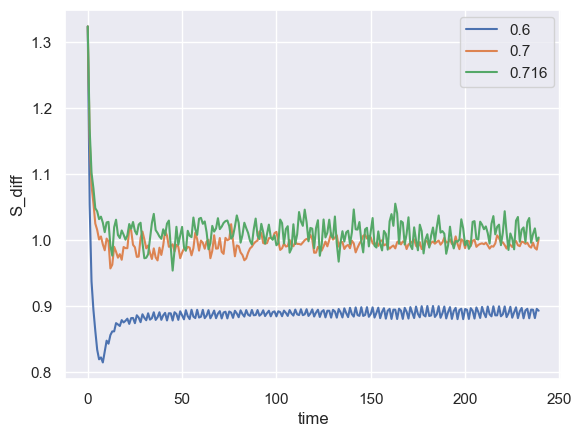

In [128]:

for a_val in a_vals:
    plt.plot(ts, S_diffs[a_val], label=a_val)

plt.legend()

plt.xlabel("time", fontsize=12)
plt.ylabel("S_diff", fontsize=12)